# Demo Notebook for 20151226 - Sandgate

Required:
- pyart installed using anaconda https://github.com/ARM-DOE/pyart/
- uq-xpol binary_to_odimh5 cloned localled and matlab installed to run it.

Set up for notebook
- Download binary files from gdrive: https://drive.google.com/open?id=0B-Mogg3f55oGREFmZFBZMGVsUTA
- Extract to a local directory
- Convert to odhimh5 using utility
- Change paths in notebook (section one and two)

Load required libraries

In [1]:
#imports
from __future__ import print_function
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import os
from netCDF4 import num2date, date2num


### Plot single SPPI

Load odimh5 file from directory into myradar object (modifiy path to file as needed)

In [9]:
fn  = '/home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113757.h5'
#Since the names in the HDF5 file are non-standard we use file_field_names = True
myradar = pyart.aux_io.read_odim_h5(fn, file_field_names=True) 

create grid lines and correct myradar azimuths to sector PPI (fix required)

In [20]:
lat_lines = np.arange(-26.5,-28.5,-.1)
lon_lines = np.arange(152.5, 154, .1)
my_display = pyart.graph.RadarMapDisplay(myradar)
my_display.azimuths = np.linspace(190,350,363)+164
#164 offset


Plot DBZH and VRADH wiht a marker for Beaudesert

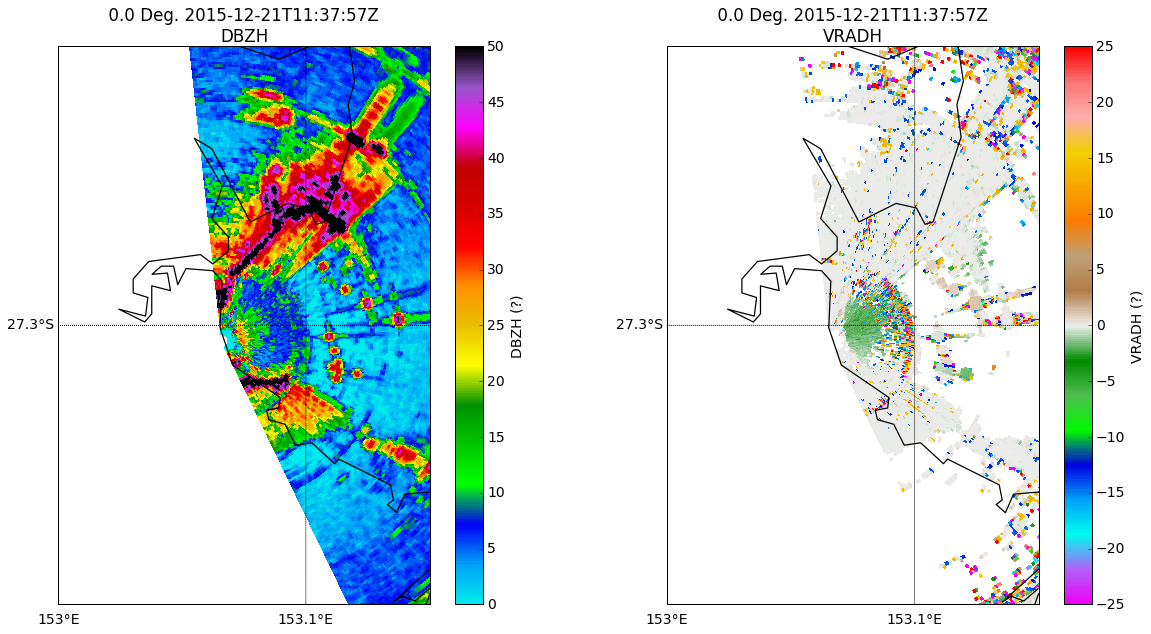

In [24]:
font = {'size': 14}
matplotlib.rc('font', **font)

f = plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
my_display.plot_ppi_map('DBZH', vmin=0, vmax=50, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -27.2, min_lat =-27.4, min_lon = 153, max_lon = 153.15,
                        cmap = pyart.graph.cm.NWSRef)

plt.subplot(1,2,2)
my_display.plot_ppi_map('VRADH', vmin=-25, vmax=25, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -27.2, min_lat =-27.4, min_lon = 153, max_lon = 153.15,
                       cmap = pyart.graph.cm.EWilson17)


### Process a sequence of radar files

load directory listing (change as needed to dir containing odimh5 files)

In [6]:
dirr = '/home/meso/temp/h5_20151221/precalibration/'
fls = os.listdir(dirr)
fls.sort()

loop through file list and export plots to file

doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113650.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113656.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113703.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113709.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113715.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113721.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113728.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113734.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113741.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113747.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113757.h5
doing  /home/meso/temp/h5_20151221/precalibration/uq-xpol_sppi_20151221_113803.h5
doing  /home/mes

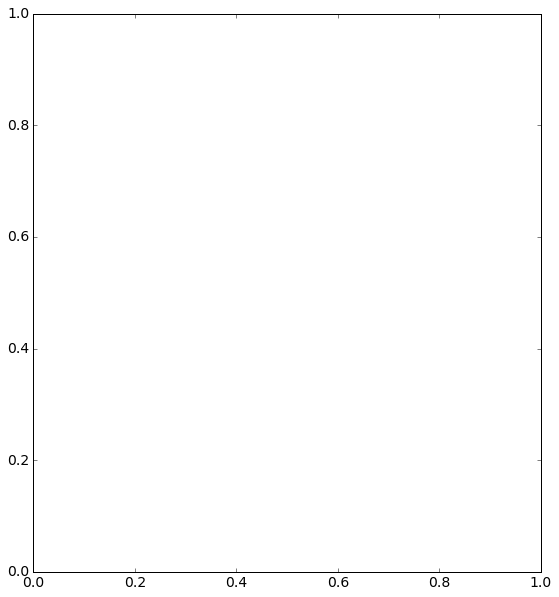

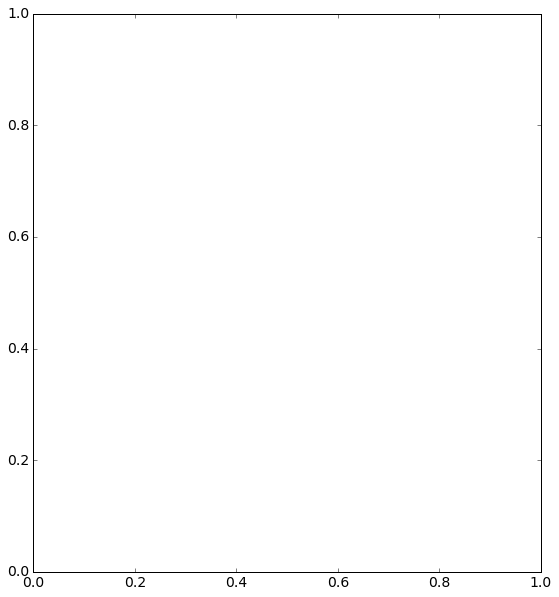

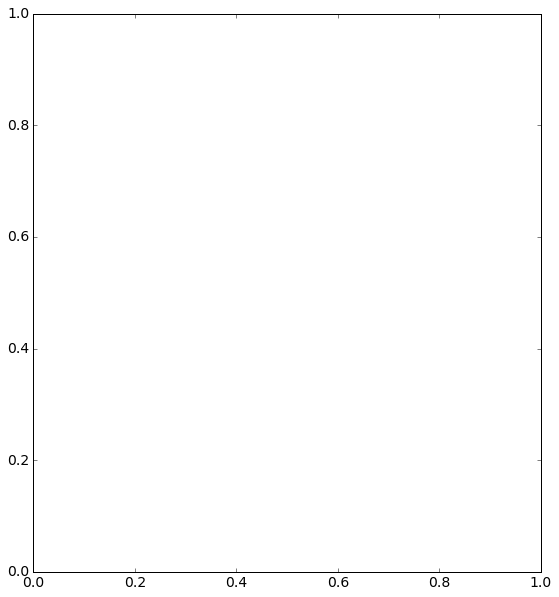

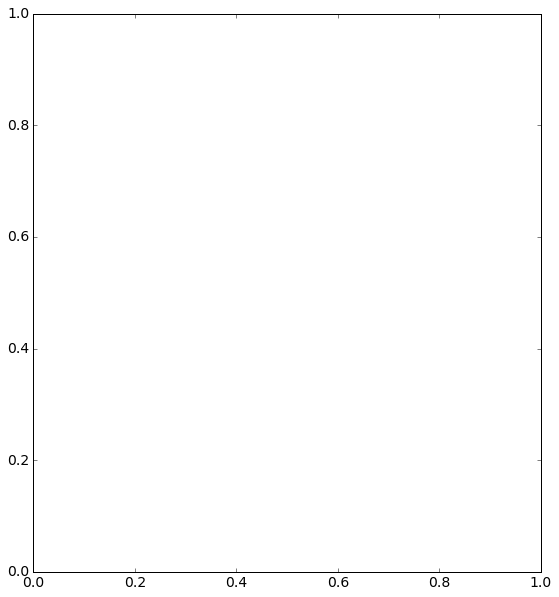

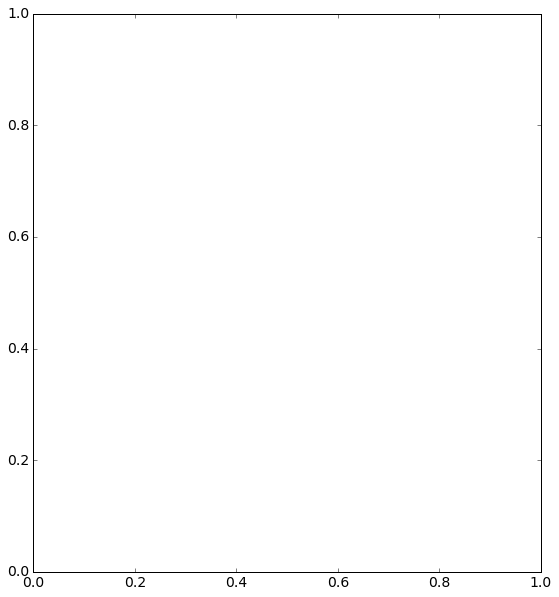

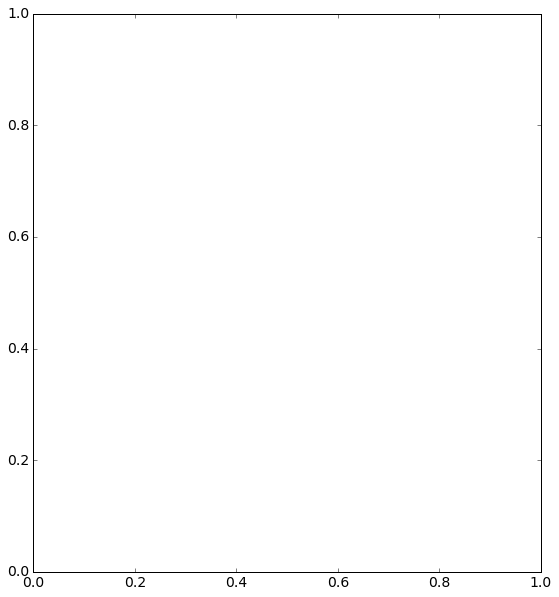

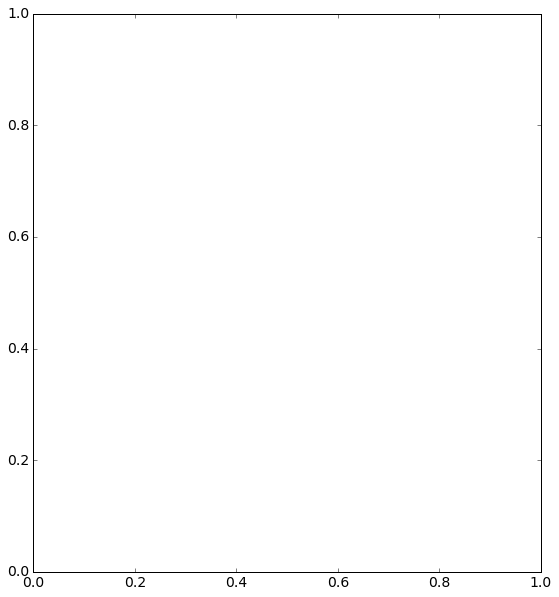

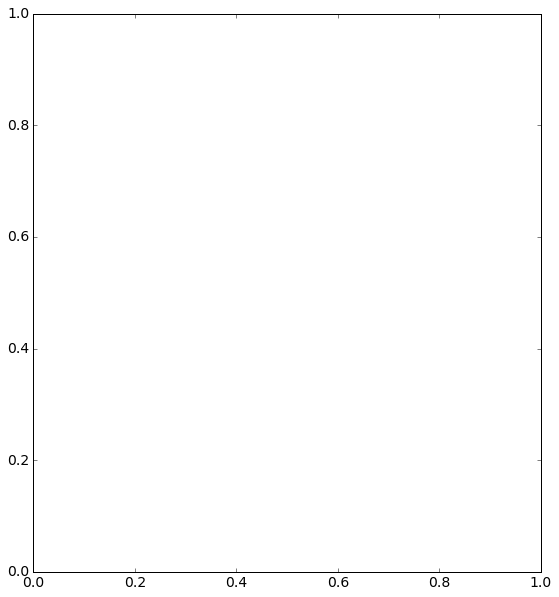

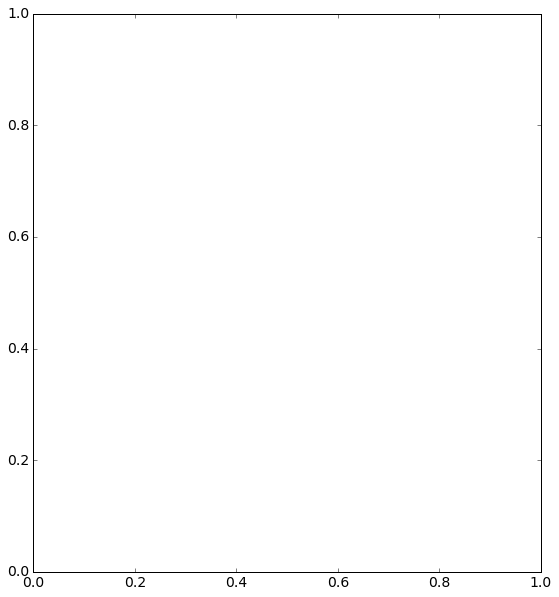

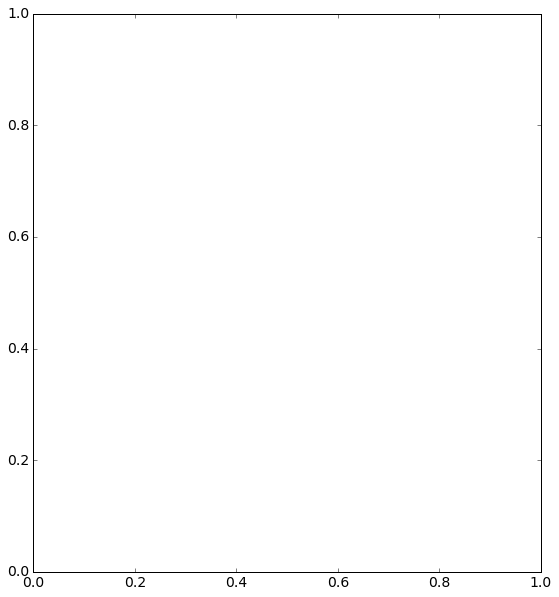

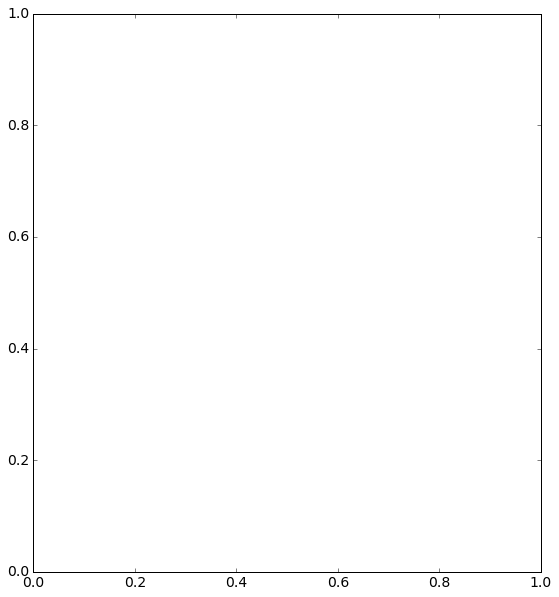

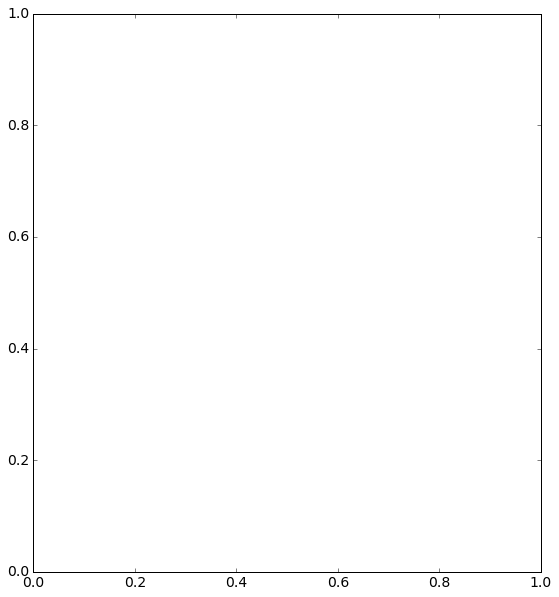

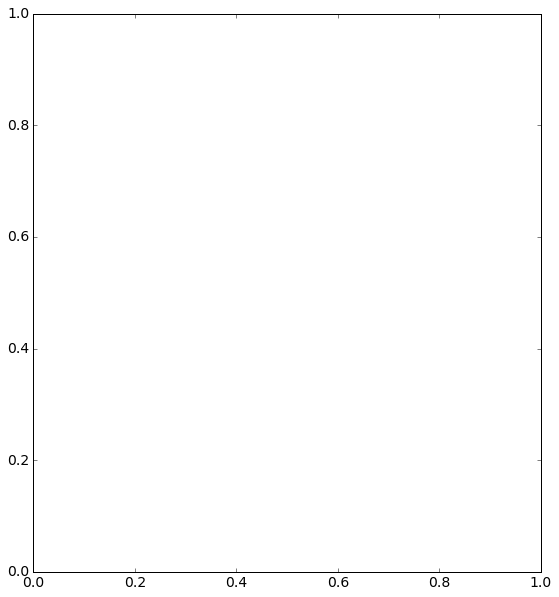

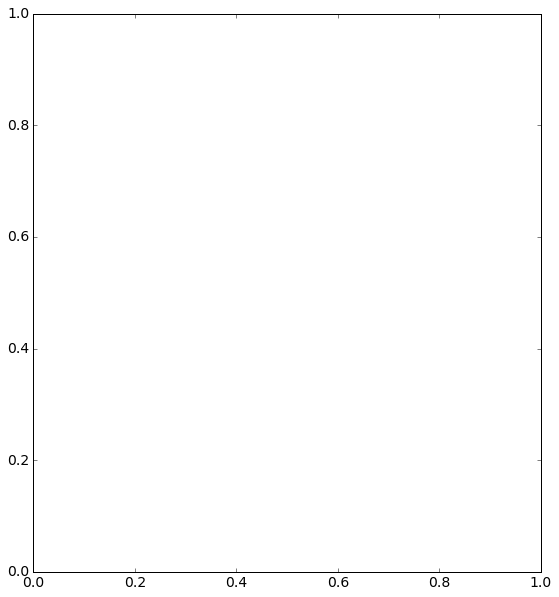

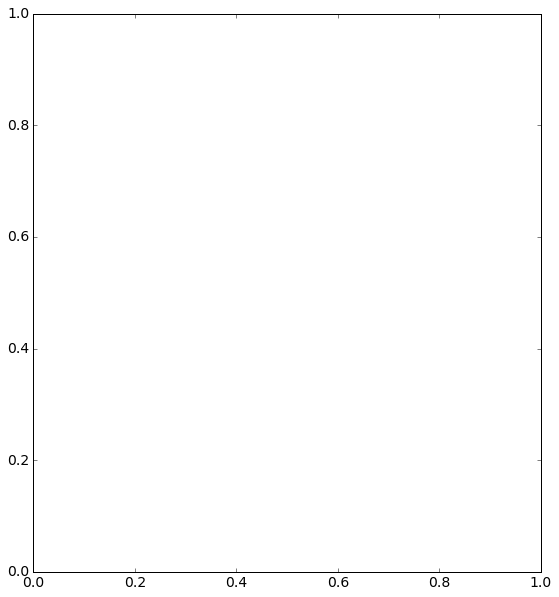

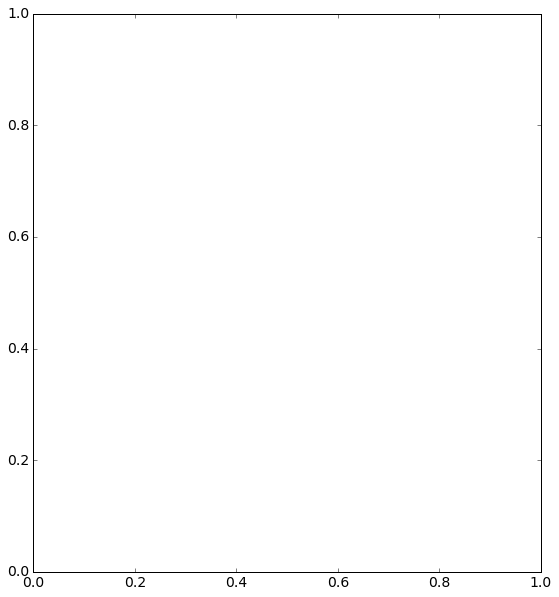

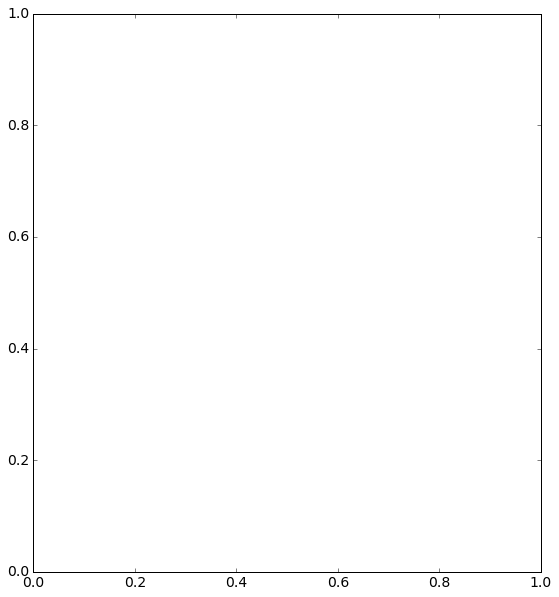

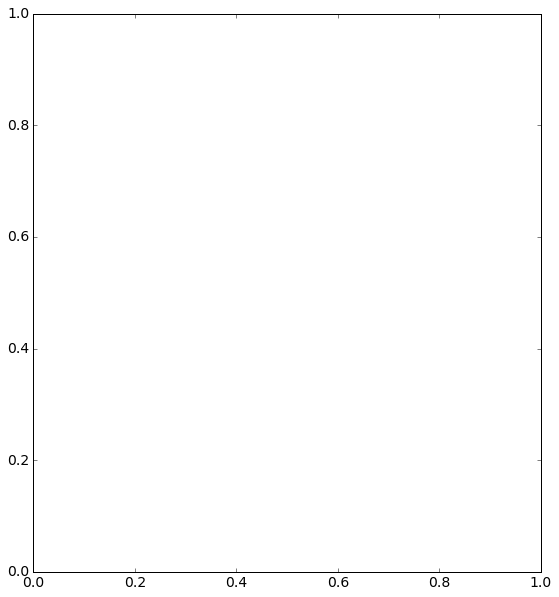

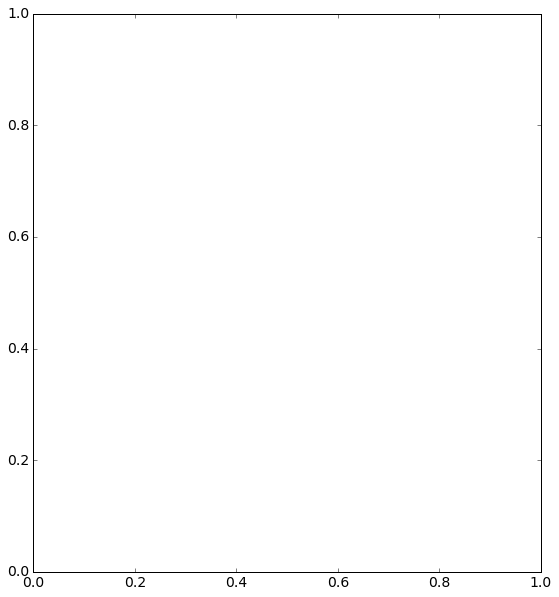

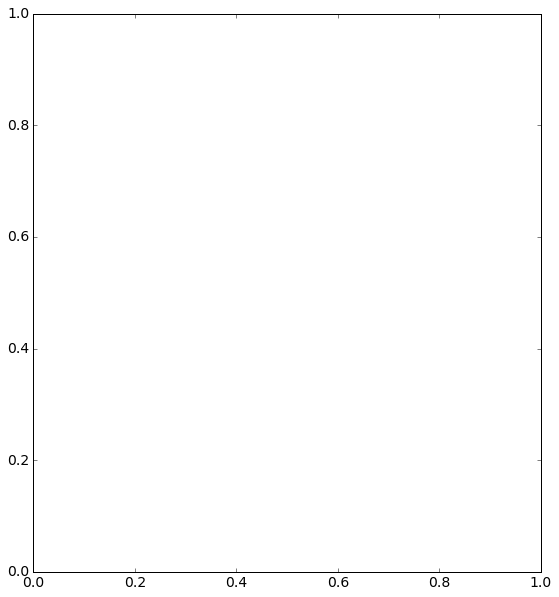

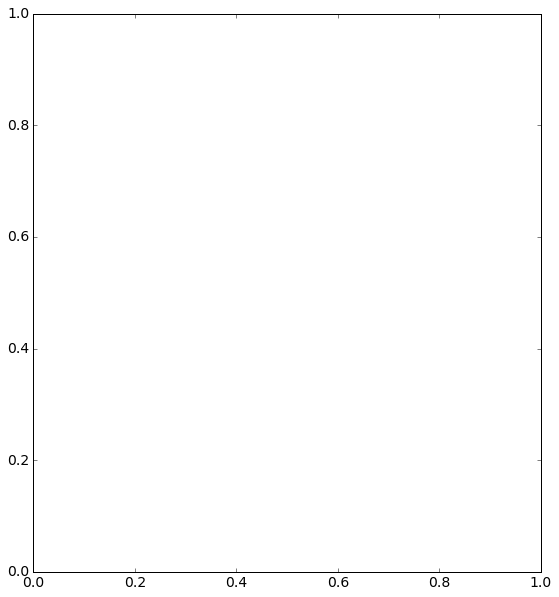

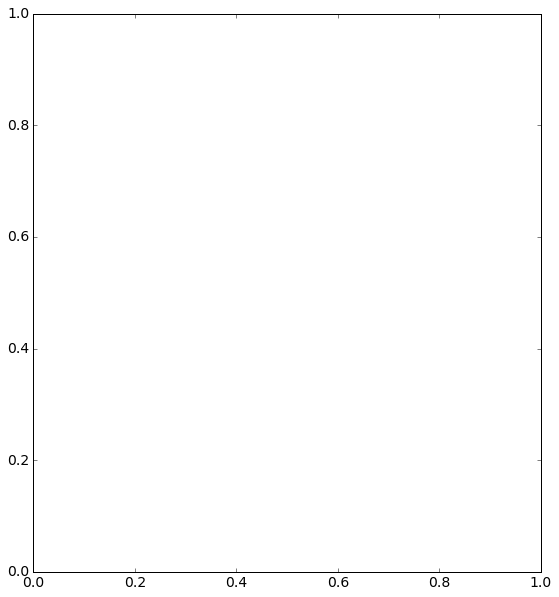

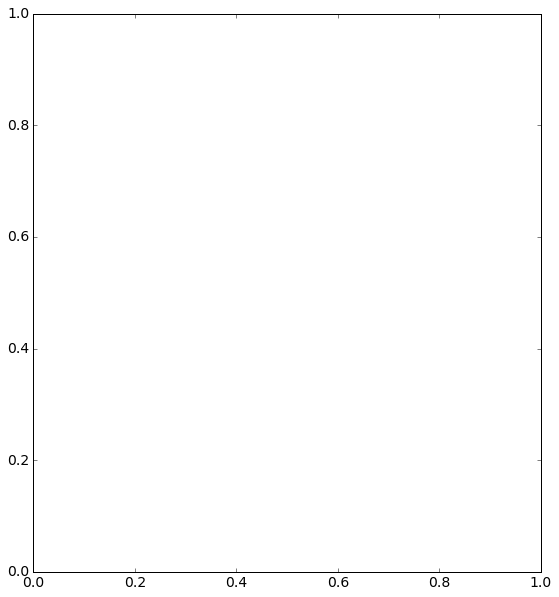

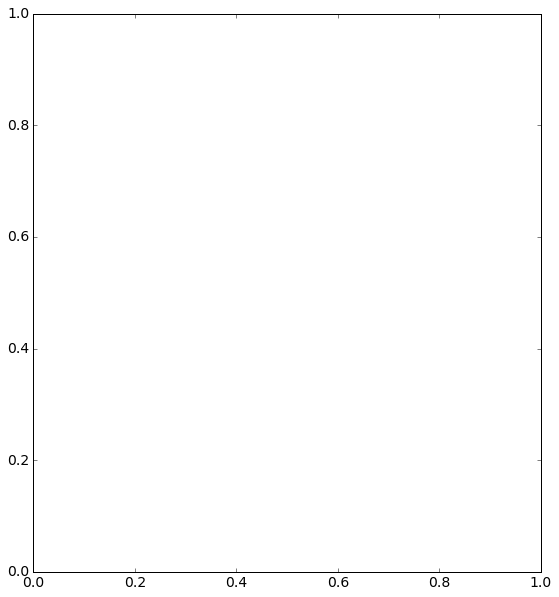

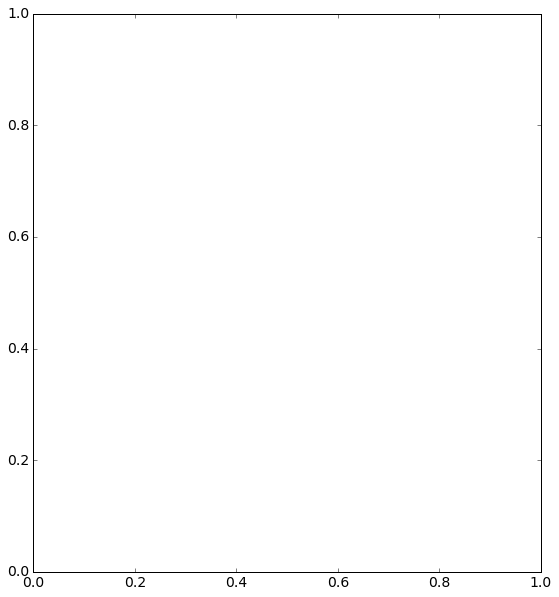

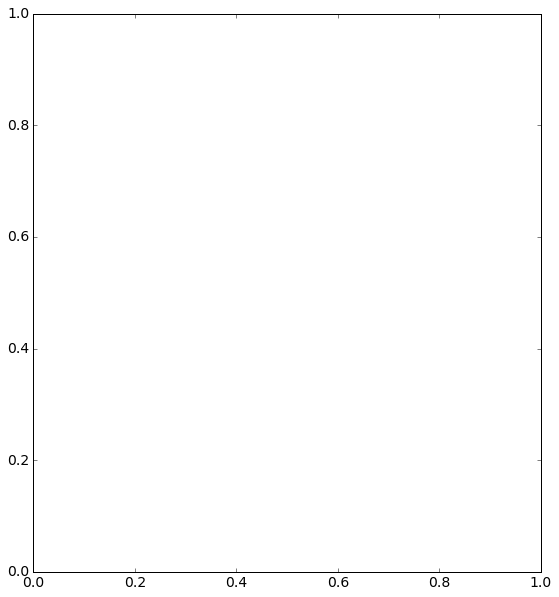

In [8]:

i = 0
for fl in fls:
    try:
        print('doing ', dirr+ fl)
        myradar = pyart.aux_io.read_odim_h5(dirr+ fl, file_field_names=True)
        
        lat_lines = np.arange(-26.5,-28.5,-.1)
        lon_lines = np.arange(152.5, 154, .1)
        my_display = pyart.graph.RadarMapDisplay(myradar)
        my_display.azimuths=np.linspace(190,350,363)+164
        
        
        font = {'size': 14}
        matplotlib.rc('font', **font)
        f = plt.figure(figsize=[20,10])
        plt.subplot(1,2,1)
        my_display.plot_ppi_map('DBZH', vmin=0, vmax=50, 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -27.15, min_lat =-27.45, min_lon = 153, max_lon = 153.3,
                                cmap = pyart.graph.cm.NWSRef)
        
        ax = plt.gca()
        plt.subplot(1,2,2)
        my_display.plot_ppi_map('VRADH', vmin=-25, vmax=25, 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -27.15, min_lat =-27.45, min_lon = 153, max_lon = 153.3,
                                cmap = pyart.graph.cm.EWilson17)
        
        ax = plt.gca()
        plt.savefig('/home/meso/temp/images_20151221/precalibration/sandgate_%03.0f.png' %i, dpi=100)
        plt.close()
        i = i +1
    except:
        pass
